In [2]:
# POde pular essa etapa se os pacotes já estão instalados
!pip install numpy
!pip install scikit-learn
!pip install scikit-image
!pip install librosa
!pip install tqdm
!pip install matplotlib
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 803.9 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 17.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 886.1 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 25.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 4.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 7.2 MB/s eta 0:00:00
  Using cached pycparser-2.22-py3-none-any.wh

In [1]:
#ref: https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram
import os
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.losses import CategoricalCrossentropy
from keras.models import Sequential, load_model
from keras.layers import GRU, LSTM, Conv2D, MaxPooling2D, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Activation, TimeDistributed
from PIL import Image
#to play audio
import IPython.display as ipd


In [20]:
# Nesse caso você precisa ter no seu diretório uma pasta com o mesmo nome da variável base_dir
base_dir = "clean_audioset"
tipo_espectrograma = "L3M"

# E dentro da pasta audioset, você precisa de 3 pastas: carros, motocicletas e motosserras contendo os áudios
audio_carro_path = base_dir + "/carros/"
audio_moto_path = base_dir + "/motocicletas/"  # caminho onde estão os arquivos de audio
audio_serra_path = base_dir + "/motosserras/"

spec_base_path = base_dir + f"/{tipo_espectrograma}"
spec_carro_path = os.path.join(spec_base_path, "carros")
spec_moto_path = os.path.join(spec_base_path, "motocicletas")
spec_serra_path = os.path.join(spec_base_path, "motosserras")
 
os.makedirs(spec_base_path, exist_ok=True)
os.makedirs(spec_carro_path, exist_ok=True)
os.makedirs(spec_moto_path, exist_ok=True)
os.makedirs(spec_serra_path, exist_ok=True)

FILE_FORMAT = "png"
TAM_IMAGEM = 128


In [21]:
audio_carro_clips = sorted(os.listdir(audio_carro_path))[:50]
print(f"Número de arquivos .wav na pasta {audio_carro_path}= ",len(audio_carro_clips))

audio_moto_clips = sorted(os.listdir(audio_moto_path))[:50]
print(f"Número de arquivos .wav na pasta {audio_moto_path}= ",len(audio_moto_clips))

audio_serra_clips = sorted(os.listdir(audio_serra_path))[:50]
print(f"Número de arquivos .wav na pasta {audio_serra_path}= ",len(audio_serra_clips))

Número de arquivos .wav na pasta clean_audioset/carros/=  50
Número de arquivos .wav na pasta clean_audioset/motocicletas/=  50
Número de arquivos .wav na pasta clean_audioset/motosserras/=  50


In [22]:
#aqui está selecionando o primeiro arquivo da lista, pode ser feito um for para pegar todos de uma vez
#verificar esse sample rate
x_carro, sr_carro = librosa.load(audio_carro_path+audio_carro_clips[0]) 
x_moto, sr_moto = librosa.load(audio_moto_path+audio_moto_clips[4]) 
x_serra, sr_serra = librosa.load(audio_serra_path+audio_serra_clips[6]) 

print(type(x_carro), type(sr_carro))
print(x_carro.shape, sr_carro)

print(type(x_moto), type(sr_moto))
print(x_moto.shape, sr_moto)

print(type(x_serra), type(sr_serra))
print(x_serra.shape, sr_serra)

<class 'numpy.ndarray'> <class 'int'>
(220676,) 22050
<class 'numpy.ndarray'> <class 'int'>
(114308,) 22050
<class 'numpy.ndarray'> <class 'int'>
(1323000,) 22050


TESTE L3M

In [27]:
y, sr = librosa.load(audio_carro_path+audio_carro_clips[0])
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=4096)
S = - librosa.power_to_db(spect, ref=np.max)
#S = - S
S

array([[36.666298, 37.88881 , 40.49716 , ..., 31.704123, 31.800653,
        33.339485],
       [32.11648 , 31.742023, 32.68452 , ..., 29.202553, 31.177109,
        34.093697],
       [37.003235, 36.04529 , 36.119267, ..., 29.753702, 30.255087,
        32.08129 ],
       ...,
       [67.220276, 67.07065 , 67.84952 , ..., 55.679337, 55.39315 ,
        56.601852],
       [69.719086, 69.86572 , 71.01788 , ..., 58.140434, 58.278053,
        60.16245 ],
       [72.54654 , 73.60687 , 77.30834 , ..., 67.746124, 67.9509  ,
        70.06128 ]], dtype=float32)

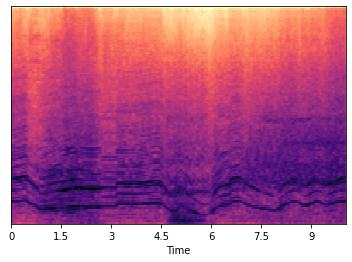

In [28]:
librosa.display.specshow(S, sr=sr, x_axis='time')

array([[5.865297 , 5.879541 , 5.9084544, ..., 5.802146 , 5.803466 ,
        5.823989 ],
       [5.807758 , 5.8026648, 5.815372 , ..., 5.766451 , 5.7948656,
        5.833704 ],
       [5.8692694, 5.8578787, 5.858769 , ..., 5.7745714, 5.7818284,
        5.807282 ],
       ...,
       [6.12853  , 6.1275625, 6.132577 , ..., 6.046724 , 6.044486 ,
        6.0538607],
       [6.1443815, 6.145294 , 6.152398 , ..., 6.0655084, 6.066535 ,
        6.0803556],
       [6.161647 , 6.1679482, 6.189256 , ..., 6.1319146, 6.1332254,
        6.146508 ]], dtype=float32)

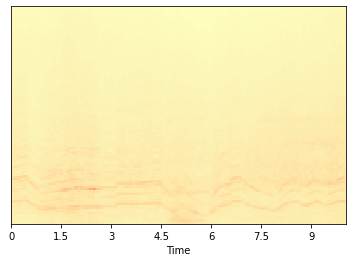

In [41]:
ref_value = 50.
S_dB =  (10*np.log10(S+ 1e-10) -  10*np.log10(ref_value) +60)/10
librosa.display.specshow(S_dB, sr=sr, x_axis='time')
S_dB

In [42]:
print (ref_value)

50.0


C:\Users\elisams\AppData\Local\Temp\ipykernel_13228\1269817526.py:1: RuntimeWarning: invalid value encountered in log10
  S_linha_dB =  (10*np.log10(S_dB+ 1e-10) -  10*np.log10(ref_value) +10)/40


array([[0.01732998, 0.01759334, 0.01812596, ..., 0.01615467, 0.01617935,
        0.01656263],
       [0.01625962, 0.01616435, 0.01640186, ..., 0.01548464, 0.01601834,
        0.01674359],
       [0.01740351, 0.01719258, 0.01720908, ..., 0.01563742, 0.01577377,
        0.01625073],
       ...,
       [0.02209659, 0.02207942, 0.02216825, ..., 0.02063751, 0.02059734,
        0.02076559],
       [0.02237704, 0.02239318, 0.02251859, ..., 0.0209743 , 0.02099266,
        0.02123973],
       [0.02268169, 0.02279267, 0.02316708, ..., 0.02215653, 0.02217972,
        0.02241461]], dtype=float32)

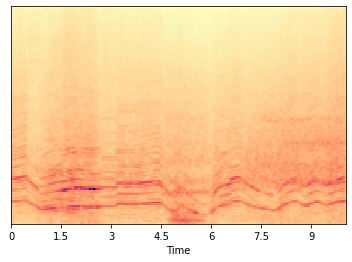

In [43]:

S_linha_dB =  (10*np.log10(S_dB+ 1e-10) -  10*np.log10(ref_value) +10)/40
librosa.display.specshow(S_linha_dB, sr=sr, x_axis='time')
S_linha_dB

C:\Users\elisams\AppData\Local\Temp\ipykernel_13228\1113286539.py:1: RuntimeWarning: invalid value encountered in log10
  S_2linhas_dB =  (10*np.log10(S_linha_dB+ 1e-10) -  10*np.log10(ref_value) +60)/10


array([[2.5398278, 2.5463784, 2.5593307, ..., 2.5093281, 2.5099912,
        2.5201592],
       [2.5121408, 2.5095882, 2.5159233, ..., 2.490931 , 2.5056477,
        2.5248787],
       [2.5416667, 2.5363708, 2.5367875, ..., 2.495195 , 2.4989655,
        2.5119026],
       ...,
       [2.6453552, 2.6450176, 2.6467614, ..., 2.6156876, 2.614841 ,
        2.6183743],
       [2.6508324, 2.651146 , 2.6535714, ..., 2.6227174, 2.6230972,
        2.628179 ],
       [2.6567054, 2.6588254, 2.6659012, ..., 2.6465316, 2.646986 ,
        2.651561 ]], dtype=float32)

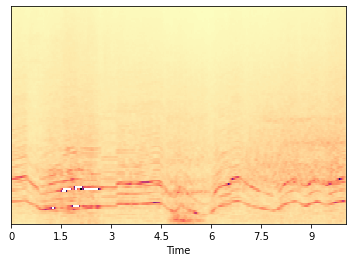

In [44]:

S_2linhas_dB =  (10*np.log10(S_linha_dB+ 1e-10) -  10*np.log10(ref_value) +60)/10
librosa.display.specshow(S_2linhas_dB, sr=sr, x_axis='time')
S_2linhas_dB

# Salvar valores de espectrograma
 - Pule esse passo se os arquivos já estiverem na pasta

In [50]:
##converter o audio para espectrograma:255
## é nesse amplitude_to_dB que ele está convertendo para pressão sonora. Podemos explorar outras ponderações aqui. Se não tiver implementado, podemos implementar.
def gerar_espectrograma(y, sr):

    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=4096)
    ref_value = 50.
    S = - librosa.power_to_db(spect, ref=np.max)
    S_dB =  (10*np.log10(S+ 1e-10) -  10*np.log10(ref_value) +60)/10
    S_linha_dB =  (10*np.log10(S_dB+ 1e-10) -  10*np.log10(ref_value) +10)/40
    S_2linhas_dB =  (10*np.log10(S_linha_dB+ 1e-10) -  10*np.log10(ref_value) +60)/10
    
    print (S_2linhas_dB)
    return S_2linhas_dB


def cortar_espectrograma(spectrogram, largura_janela=TAM_IMAGEM, altura_janela=TAM_IMAGEM):
    altura_spec = spectrogram.shape[0]+1
    largura_spec = spectrogram.shape[1]
    spectrogram_slices = []

    print("Tamanho espectrograma:",spectrogram.shape )

    for h in range(altura_janela, altura_spec, altura_janela):
        for w in range(largura_janela, largura_spec, largura_janela):
            slice = spectrogram[h-altura_janela : h,   # largura
                                w-largura_janela : w,  # altura
                                np.newaxis]
            spectrogram_slices.append(slice)
            
    return spectrogram_slices    
    

In [51]:

# Salvar espectrogramas na pasta específica (carros, serras etc)
def salvar_espectrogtramas (audio_clips, audio_path, spectrogram_path, audios_por_arquivo=50):
    numero_audios = len(audio_clips)
    num_arquivo = 1

    spectrogram_values = []
    
    for i, audio_name in enumerate(audio_clips):
        y, sr = librosa.load( os.path.join(audio_path, audio_name) )
        audio_name = audio_name.replace(".mp3", "")

        fullpath = os.path.join(spectrogram_path, audio_name)
        try:
            mel_spec = gerar_espectrograma(y, sr)
            mel_spec = 255 * (mel_spec - mel_spec.min()) / (mel_spec.max() - mel_spec.min())
            #mel_spec = np.flip(mel_spec, axis=0) # put low frequencies at the bottom in image
            #fft_spec = 255 - fft_spec
            mel_spec_slices = cortar_espectrograma(mel_spec)
            
            # Salva o arquivo e começa o próximo
            for j in range(len(mel_spec_slices)):
                full_filename = fullpath + f"_{j+1}.{FILE_FORMAT}"
                spec_save = mel_spec_slices[j][:, :, 0]

                if FILE_FORMAT == "csv":
                    np.savetxt(full_filename, spec_save, delimiter=",")
                else:
                    print(spec_save.min(), spec_save.max())
                    im = Image.fromarray(spec_save).convert("L")
                    im.save(full_filename)

            print("Arquivo %s salvo com sucesso." % full_filename)
                
        except Exception as e:
            print( "Erro ao salvar %s: %s." % (fullpath, e) )


salvar_espectrogtramas(audio_carro_clips, audio_carro_path, spec_carro_path)

salvar_espectrogtramas(audio_moto_clips, audio_moto_path, spec_moto_path)

salvar_espectrogtramas(audio_serra_clips, audio_serra_path, spec_serra_path)


C:\Users\elisams\AppData\Local\Temp\ipykernel_13228\2177018282.py:9: RuntimeWarning: invalid value encountered in log10
  S_linha_dB =  (10*np.log10(S_dB+ 1e-10) -  10*np.log10(ref_value) +10)/40
C:\Users\elisams\AppData\Local\Temp\ipykernel_13228\2177018282.py:10: RuntimeWarning: invalid value encountered in log10
  S_2linhas_dB =  (10*np.log10(S_linha_dB+ 1e-10) -  10*np.log10(ref_value) +60)/10


[[2.5398278 2.5463784 2.5593307 ... 2.5093281 2.5099912 2.5201592]
 [2.5121408 2.5095882 2.5159233 ... 2.490931  2.5056477 2.5248787]
 [2.5416667 2.5363708 2.5367875 ... 2.495195  2.4989655 2.5119026]
 ...
 [2.6453552 2.6450176 2.6467614 ... 2.6156876 2.614841  2.6183743]
 [2.6508324 2.651146  2.6535714 ... 2.6227174 2.6230972 2.628179 ]
 [2.6567054 2.6588254 2.6659012 ... 2.6465316 2.646986  2.651561 ]]
Tamanho espectrograma: (128, 432)
nan nan
nan nan
nan nan
Arquivo clean_audioset/L3M\carros\(HD) - Forza 4 - Top Gear - Car Test - 1990 Lotus Carlton-0GZbu00-aMY_3.png salvo com sucesso.
[[2.4778202 2.4855485 2.5064614 ... 2.5223641 2.4991403 2.4813495]
 [2.4726906 2.480391  2.5014412 ... 2.44199   2.4288838 2.4276772]
 [2.4752107 2.4796097 2.4892547 ... 2.3926158 2.385947  2.398458 ]
 ...
 [2.6202607 2.615942  2.615036  ... 2.550405  2.5564435 2.5657468]
 [2.6244082 2.619928  2.6194427 ... 2.5706952 2.574243  2.5796914]
 [2.65112   2.6478953 2.647084  ... 2.607018  2.6084442 2.6116166

C:\Users\elisams\AppData\Local\Temp\ipykernel_13228\2177018282.py:8: RuntimeWarning: invalid value encountered in log10
  S_dB =  (10*np.log10(S+ 1e-10) -  10*np.log10(ref_value) +60)/10


[[2.5200143 2.5282357 2.5497355 ... 2.5788147 2.5708473 2.5646033]
 [2.4623222 2.4674582 2.4905713 ... 2.4980495 2.5067513 2.5237622]
 [2.3829224 2.380806  2.4098434 ... 2.4780502 2.4953575 2.5230918]
 ...
 [2.637143  2.64039   2.6507568 ... 2.6707566 2.6707566 2.6707566]
 [2.6412704 2.644339  2.6542695 ... 2.6707566 2.6707566 2.6707566]
 [2.6505342 2.653305  2.6623986 ... 2.6707566 2.6707566 2.6707566]]
Tamanho espectrograma: (128, 388)
nan nan
nan nan
nan nan
Arquivo clean_audioset/L3M\carros\A guy trying to start car after flood-0TGPaUN2V5Q_3.png salvo com sucesso.
[[2.5962944 2.596653  2.599797  ... 2.6203136 2.6229675 2.627852 ]
 [2.5914702 2.586844  2.5841835 ... 2.5806198 2.5884674 2.6027875]
 [2.5934079 2.5751014 2.5637753 ... 2.5812733 2.5920672 2.6070094]
 ...
 [2.6707566 2.6707566 2.6707566 ... 2.6456115 2.6487813 2.6536407]
 [2.6707566 2.6707566 2.6707566 ... 2.6561012 2.6591637 2.6643379]
 [2.6707566 2.6707566 2.6707566 ... 2.6707566 2.6707566 2.6707566]]
Tamanho espectrog

# Treinamento e teste de rede neural

In [15]:
# Carregar espectrogramas com uma CNN e classificar entre "motosserras e não motosserras"

espectrogramas_carro = sorted(os.listdir(spec_carro_path))
espectrogramas_moto = sorted(os.listdir(spec_moto_path))
espectrogramas_serra = sorted(os.listdir(spec_serra_path))

spectrogram_list = []
labels = []

def carregar_espectrograma(full_filename):
    if FILE_FORMAT == "png":
        return np.asarray(Image.open(full_filename))
    else:
        return np.loadtxt(full_filename, delimiter=",")


def adicionar_rotulos_spec(espectrogramas, spec_path, label):
    for filename in espectrogramas:
        full_filename = os.path.join(spec_path, filename)  

        spectrogram = carregar_espectrograma(full_filename)
        spectrogram_list.append(spectrogram)
        # 0 corresponde aos carros e motos
        labels.append(label)


adicionar_rotulos_spec(espectrogramas_carro, spec_carro_path, 0)
adicionar_rotulos_spec(espectrogramas_moto, spec_moto_path, 0)
adicionar_rotulos_spec(espectrogramas_serra, spec_serra_path, 1)


print("Número de espectrogramas carros: ", len(espectrogramas_carro))
print("Número de espectrogramas motos: ", len(espectrogramas_moto))
print("Número de espectrogramas motosserras: ", len(espectrogramas_serra))


spectrogram_np = np.array(spectrogram_list) / 255

spectrogram_np = spectrogram_np.reshape(
    (spectrogram_np.shape[0], spectrogram_np.shape[1], spectrogram_np.shape[2], 1)
)

labels_np = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    spectrogram_np, labels_np, test_size=0.05  # , random_state=42
)

print("Amostras treinamento:", len(X_train))
print("Amostras teste:", len(X_test))

Número de espectrogramas carros:  143
Número de espectrogramas motos:  146
Número de espectrogramas motosserras:  275
Amostras treinamento: 535
Amostras teste: 29


In [16]:
## Initialize the model
#model = Sequential()
#
## Add convolutional layers
#model.add(Conv2D(32, (3, 3), input_shape=X_train[0].shape))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
#model.add(Conv2D(128, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
## Flatten the output before fully connected layers
#model.add(Flatten())
#
## Fully connected layer with dropout
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#
## Output layer with softmax activation
#model.add(Dense(1, activation='sigmoid')) # Binary classification
#
## Compile the model
#model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])
## Print model summaryImage.open
#model.summary()
#model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)
#
#model.save(f"checkpoints/{tipo_espectrograma}.keras")
#
model = Sequential()

model.add(Conv2D(16, 3, activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # Binary classification
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Print model summaryImage.open
model.summary()
model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

model.save(f"checkpoints/{tipo_espectrograma}.keras")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,515,713 (24.86 MB)

 Trainable params: 6,515,713 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.4683 - loss: 0.7873 - val_accuracy: 0.6542 - val_loss: 0.6482
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6879 - loss: 0.6260 - val_accuracy: 0.6916 - val_loss: 0.6428
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7524 - loss: 0.5687 - val_accuracy: 0.6636 - val_loss: 0.5643
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7567 - loss: 0.5079 - val_accuracy: 0.7009 - val_loss: 0.5272
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7471 - loss: 0.4761 - val_accuracy: 0.7477 - val_loss: 0.4876
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8038 - loss: 0.3891 - val_accuracy: 0.8505 - val_loss: 0.4305
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8213 - loss: 0.4149 - val_accuracy: 0.8131 - val_loss: 0.3691
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8411 - loss: 0.3547 - val_accuracy: 0.8411 - v

In [17]:
model = load_model(f"checkpoints/{tipo_espectrograma}.keras")
y_pred = model.predict(X_test)[:, 0]
y_pred = np.round(y_pred)
acc = len(np.where(y_pred == y_test)[0]) / len(y_test)
print("Acurácia:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Acurácia: 1.0
